# **1. Business Objective**
This Machine Learning Model assesses credit card applications and determines whether an applicant should be approved for credit card or not. It reduces the manual workload and decision making time. By analyzing applicant data, the project aims to make informed, unbiased, and consistent approval decisions, enhancing customer experience, minimizing fraud and reducing risk for the financial instituion.



# **2. Import the required libraries**

In [568]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

# **3. Get data and perform EDA**

In [569]:
# Loading the two datasets  application data and credit status data into pandas DataFrames
# and displaying the first few rows
df1 = pd.read_csv('Credit_card.csv')
df1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [570]:
df2 =  pd.read_csv('Credit_card_label.csv')
df2.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [571]:
# Merge DataFrames based on the 'Ind_ID' common column
df = pd.merge(df1,df2,on='Ind_ID',how='inner')
df.head()      # Displaying the first five rows of merged dataframa

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [572]:
# Number of rows and columns in the final dataset
df.shape

(1548, 19)

In [573]:
# Get an overview of the dataset(columns, datatypes, non-null count)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [574]:
# Create a copy of the original dataframe df
df_new = df.copy()

In [575]:
# Convert 'Birthday_count' values to positive years
# if it is negative otherwise 'NaN'
df_new['Birthday_count'] =  df_new['Birthday_count'].apply(lambda x: -x/365.25 if x < 0 else np.nan)
df_new.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.394935,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.117043,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.117043,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.117043,-586,1,1,1,0,NaN,2,1


In [576]:
# convert 'Employed_days' values to positive years
# if it is negative otherwise zero(0)
df_new['Employed_days'] = df_new['Employed_days'].apply(lambda x: -x/365.25 if x < 0 else 0)
df_new.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.394935,0.000000,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.117043,1.604381,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,1.604381,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.117043,1.604381,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.117043,1.604381,1,1,1,0,NaN,2,1


In [577]:
# Rename columns 'Birthday_count' to 'age
# and 'Employed_days' to 'Emp_duration' in the dataframe new_df
df_new.rename(columns = {'Birthday_count':'age', 'Employed_days':'Emp_duration'}, inplace = True)
df_new.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,age,Emp_duration,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.394935,0.000000,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.117043,1.604381,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,1.604381,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.117043,1.604381,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.117043,1.604381,1,1,1,0,NaN,2,1


In [578]:
# Checking for the number of missing values in each column
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

<Axes: >

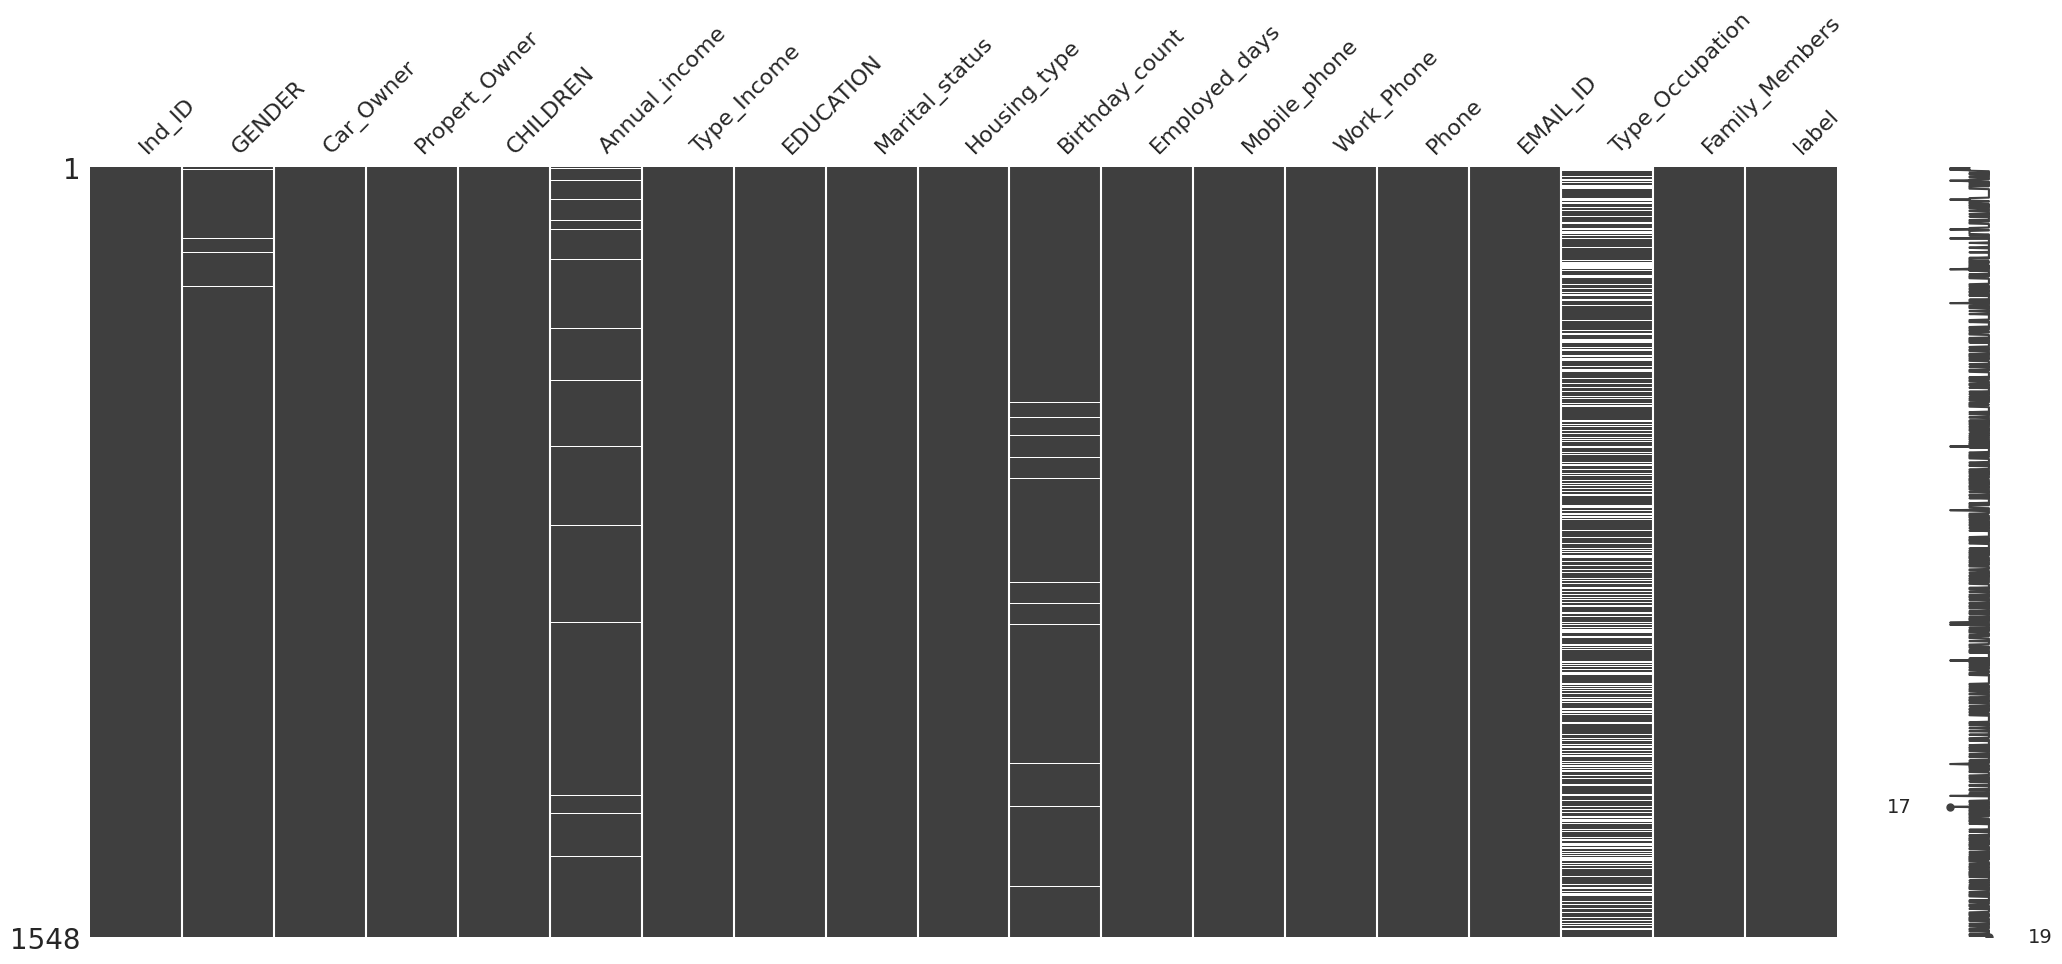

In [579]:
# Visualizing missing data using matrix
msno.matrix(df)

<Axes: >

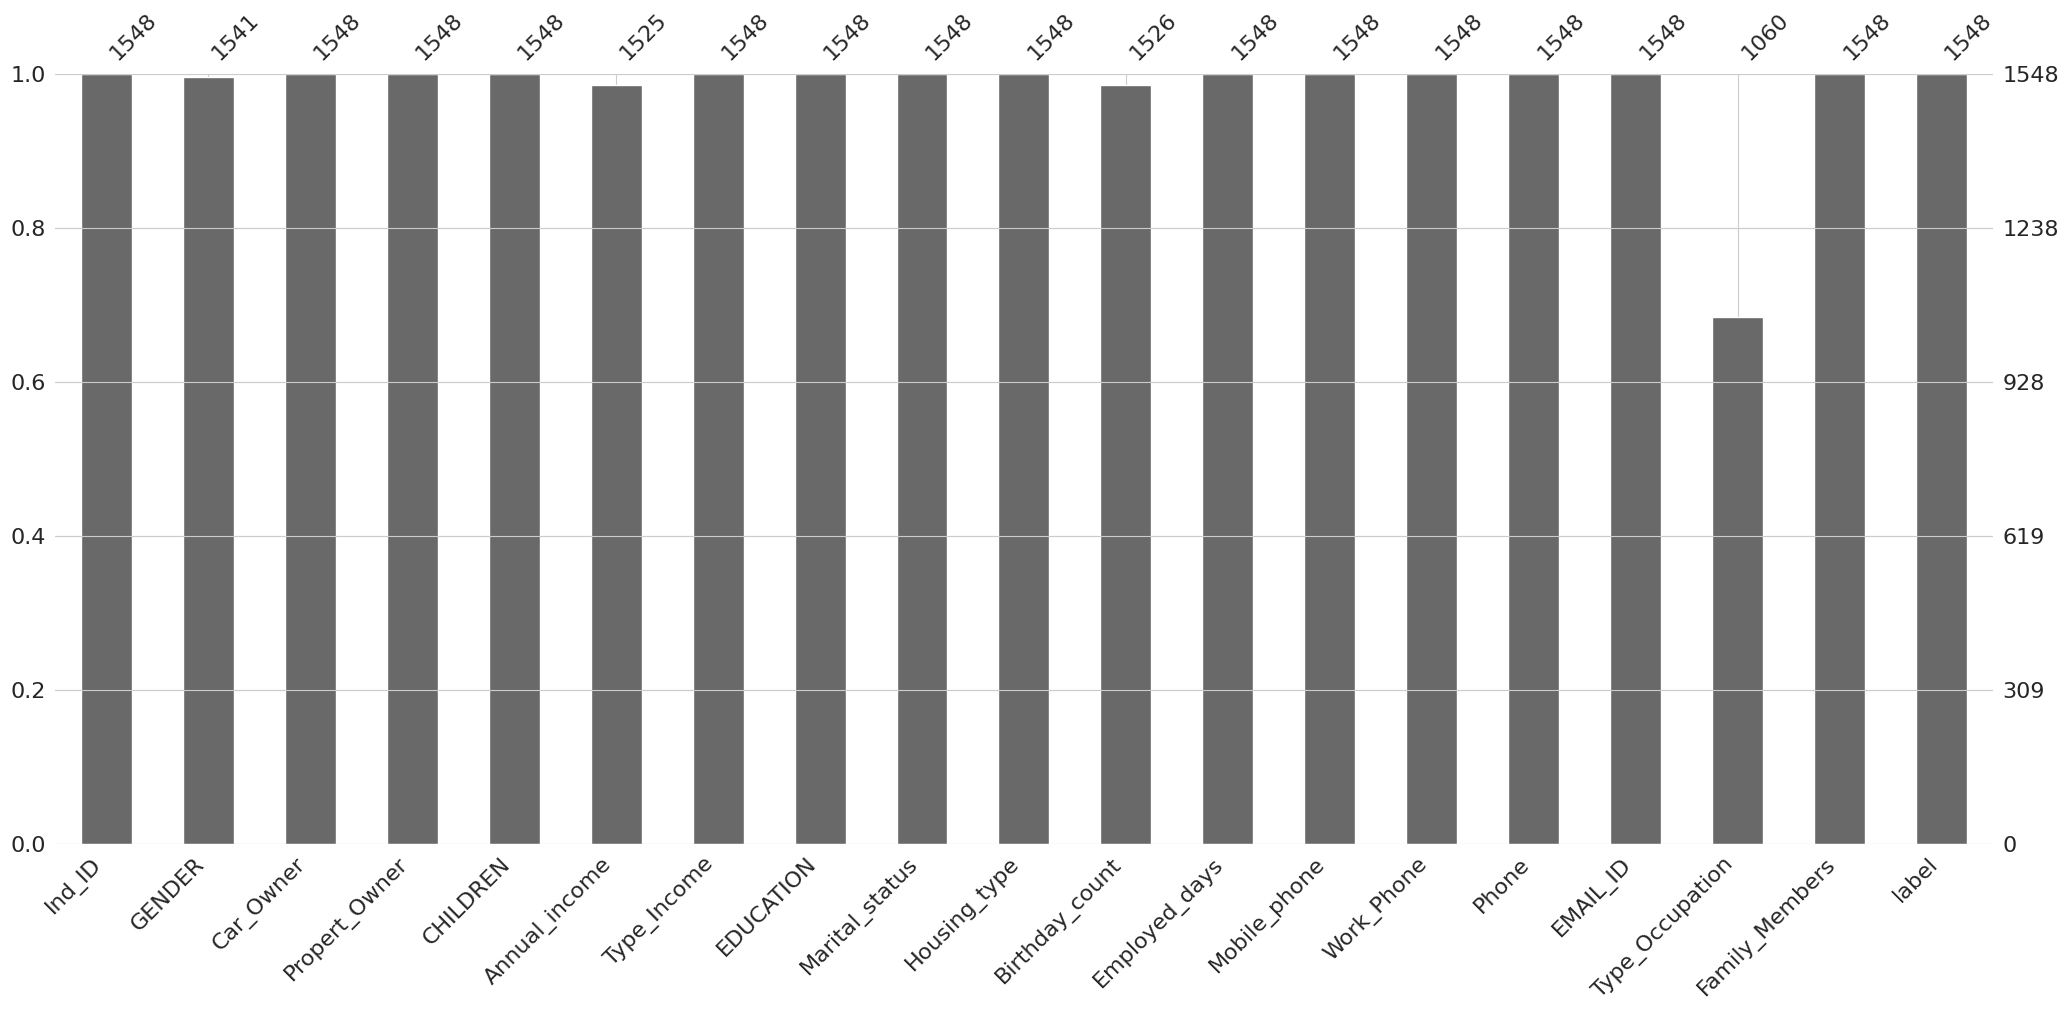

In [580]:
# Visualizing missing data using bar
msno.bar(df)

###**3.1 Univariate analysis**

##### **3.1.1 Label**

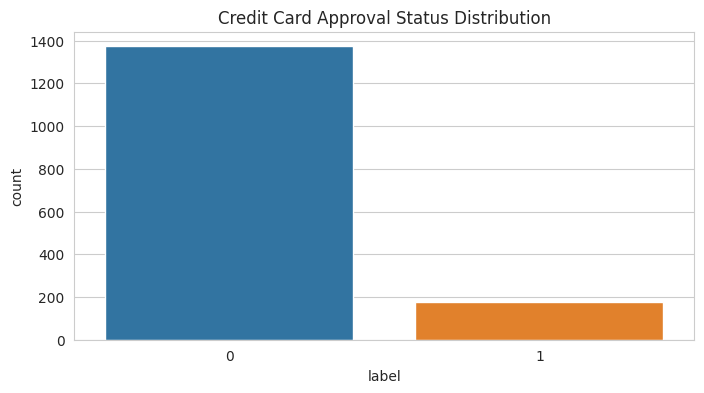

In [581]:
# visualizing the target feature distribution
plt.figure(figsize = (8,4))
sns.countplot(x = 'label', data = df)
plt.title('Credit Card Approval Status Distribution')
plt.show()

In [582]:
# find the count of each category in the target feature
category_counts = df['label'].value_counts()
print(category_counts)


0    1373
1     175
Name: label, dtype: int64


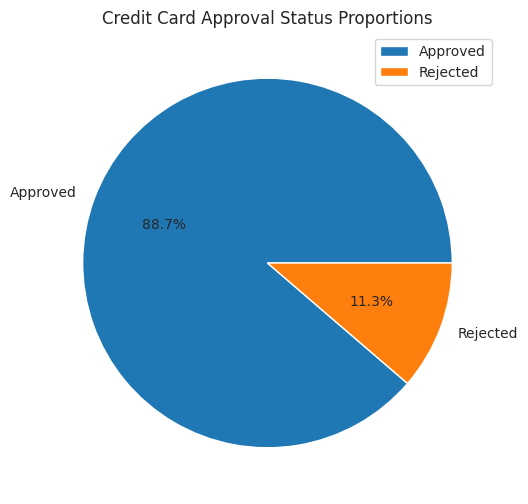

In [583]:
# visualizing the target feature proportions
plt.figure(figsize = (6,6))
plt.pie(category_counts, labels = ['Approved','Rejected'], autopct = '%1.1f%%')
plt.title('Credit Card Approval Status Proportions')
plt.legend(labels = ['Approved','Rejected'])
plt.show()

#### **3.1.2 Functions used to explore the features**

In [584]:
# Function to display the counts & frequency of categorical feaures
# and those discrete numerical features which are treated as categorical features
def categ_count_freq(df,feature):
  category_counts = df[feature].value_counts()
  category_counts_percent = df[feature].value_counts(normalize=True) * 100
  category_counts_concat = pd.concat([category_counts ,category_counts_percent ], axis=1)
  category_counts_concat.columns = ['Count', 'Frequency (%)']
  return category_counts_concat

In [585]:
# Function to visualise the distribution of categorical feaures and
#  those discrete numerical features which are treated as categorical features using countplot
def categ_countplot(df,feature):
  category_counts = df[feature].value_counts()
  if category_counts.shape[0]< 10 :
    plt.figure(figsize = (8,6))
  else:
    plt.figure(figsize = (12,6))
  sns.countplot(x = feature, data = df)
  plt.title(f'Distribution of {feature}')
  plt.xticks(rotation = 45)
  return plt.show()

In [586]:
# Function to visualize proportions of categorical feaures and
# those discrete numerical features which are treated as categorical features using pie chart
def categ_piechart(df,feature):
  category_counts = df[feature].value_counts()
  if category_counts.shape[0] < 5:
    plt.figure(figsize = (6,6))
    plt.pie(category_counts, labels = category_counts.index, autopct = '%1.1f%%')
  elif category_counts.shape[0] == 5:
    explode_1 = [0,0,0,0.8,0.8]
    plt.figure(figsize = (6,6))
    plt.pie(category_counts, labels = category_counts.index, autopct = '%1.1f%%',explode = explode_1)
  elif category_counts.shape[0] == 6:
    explode_2 = [0,0,0,0,0.8,0.8]
    plt.figure(figsize = (8,8))
    plt.pie(category_counts, labels = category_counts.index, autopct = '%1.1f%%',explode = explode_2)
  elif category_counts.shape[0] == 7:
    explode_3 = [0,0,0,0,0,0.8,0.8]
    plt.figure(figsize = (8,8))
    plt.pie(category_counts, labels = category_counts.index, autopct = '%1.1f%%',explode = explode_3)
  else:
    explode_4 = [0,0,0,0,0,0,0,0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
    plt.figure(figsize = (10,10))
    plt.pie(category_counts, labels = category_counts.index, autopct = '%1.1f%%',explode =explode_4,textprops={'fontsize': 6})
  plt.title(f'Proportions of {feature}')
  return plt.show()

In [587]:
# Function to find the summary statistics
def cont_summary_stats(df,feature):
    print(f'Summary statistics of {feature}:\n{df[feature].describe()}')

In [588]:
# Function to visualize the distribution of continuous feature
# along with skewness using histogram
def cont_histogram(df,feature):
    plt.figure(figsize = (10,8))
    sns.histplot(data = df, x = feature, bins = 10, kde =True)
    plt.title(f'Histogram of {feature}')
    plt.show()

In [589]:
# Function to visualize the summary of the distribution of the continuous features
# and the discrete features along with potential outliers using box plot
def cont_disc_boxplot(df,feature):
    plt.figure(figsize = (10,6))
    sns.boxplot(x= df[feature])
    sns.set_style('whitegrid')
    plt.title(f'Boxplot of {feature}')
    plt.show()

#### **3.1.3 Gender**

In [590]:
categ_count_freq(df,'GENDER')

,Count,Frequency (%)
F,973,63.140818
M,568,36.859182


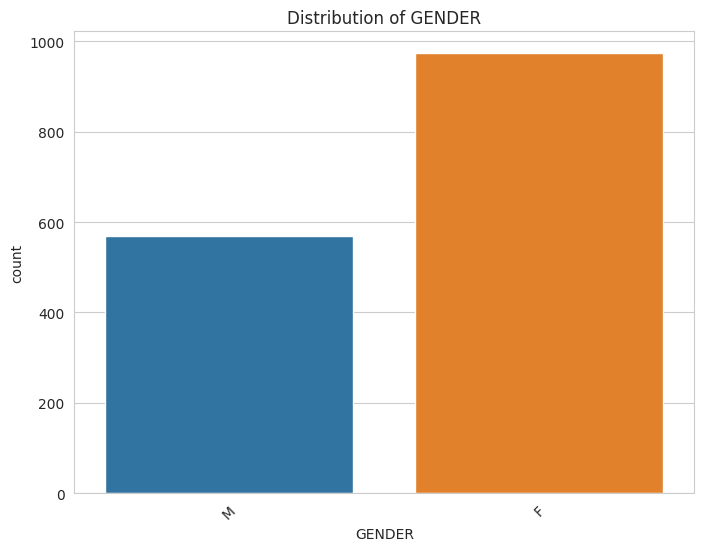

In [591]:
categ_countplot(df,'GENDER')

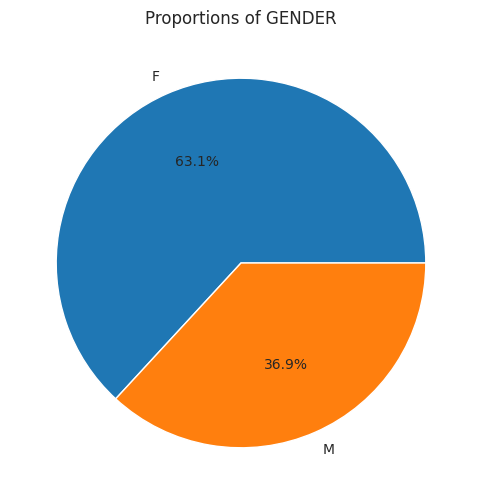

In [592]:
categ_piechart(df,'GENDER')

#### **3.1.4 Car Owner**

In [593]:
categ_count_freq(df,'Car_Owner')

,Count,Frequency (%)
N,924,59.689922
Y,624,40.310078


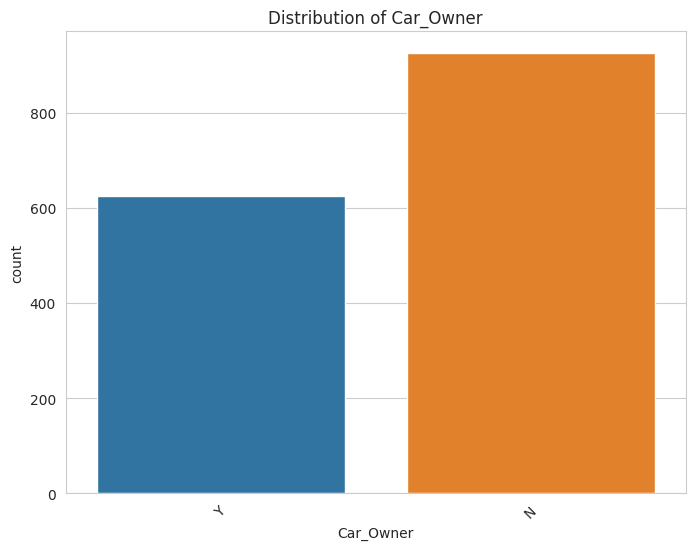

In [594]:
categ_countplot(df,'Car_Owner')

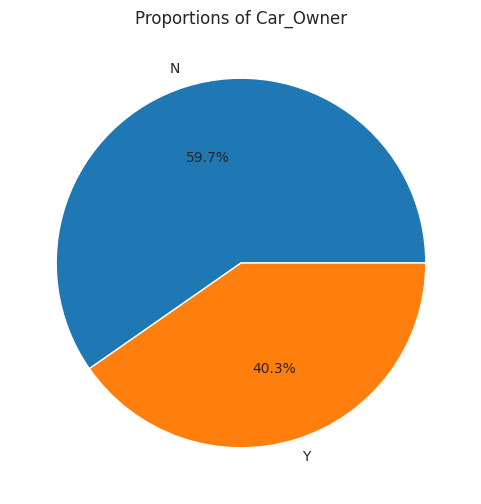

In [595]:
categ_piechart(df,'Car_Owner')


#### **3.1.5 Property Owner**

In [596]:
categ_count_freq(df,'Propert_Owner')

,Count,Frequency (%)
Y,1010,65.245478
N,538,34.754522


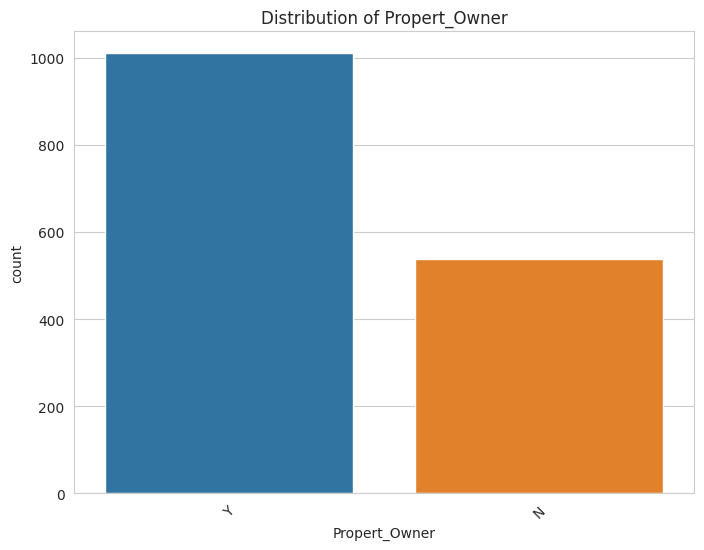

In [597]:
categ_countplot(df,'Propert_Owner')

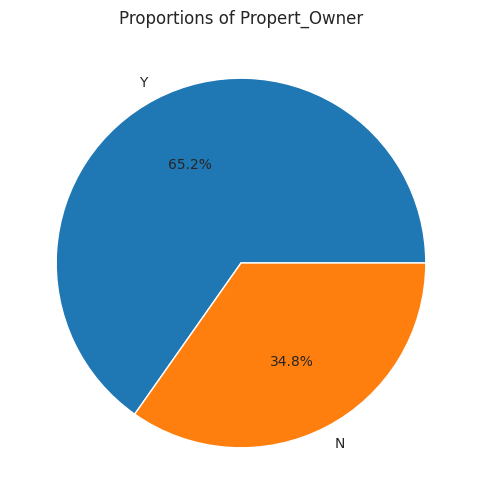

In [598]:
categ_piechart(df,'Propert_Owner')

#### **3.1.6 Income Type**

In [599]:
categ_count_freq(df,'Type_Income')

,Count,Frequency (%)
Working,798,51.550388
Commercial associate,365,23.578811
Pensioner,269,17.377261
State servant,116,7.493540


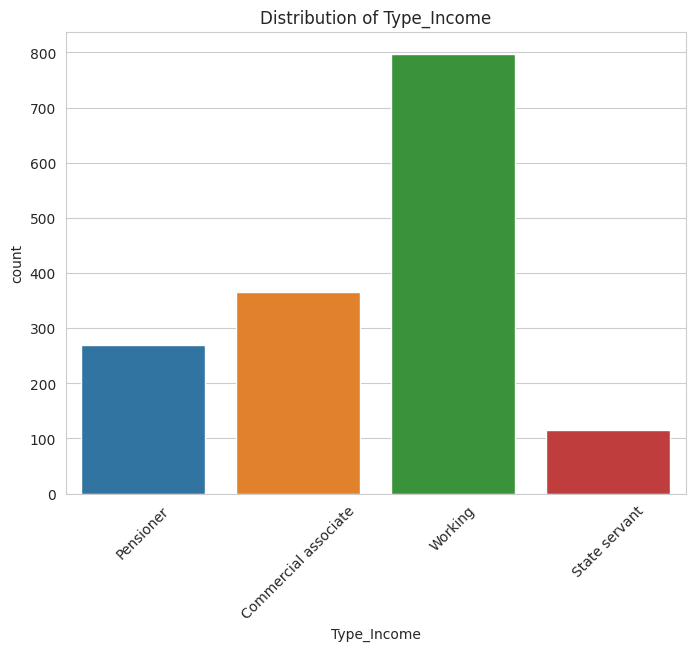

In [600]:
categ_countplot(df,'Type_Income')

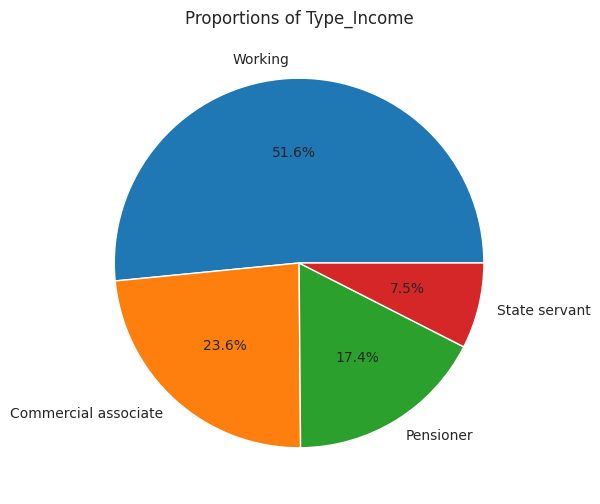

In [601]:
categ_piechart(df,'Type_Income')

#### **3.1.7 Education**

In [602]:
categ_count_freq(df,'EDUCATION')

,Count,Frequency (%)
Secondary / secondary special,1031,66.602067
Higher education,426,27.519380
Incomplete higher,68,4.392765
Lower secondary,21,1.356589
Academic degree,2,0.129199


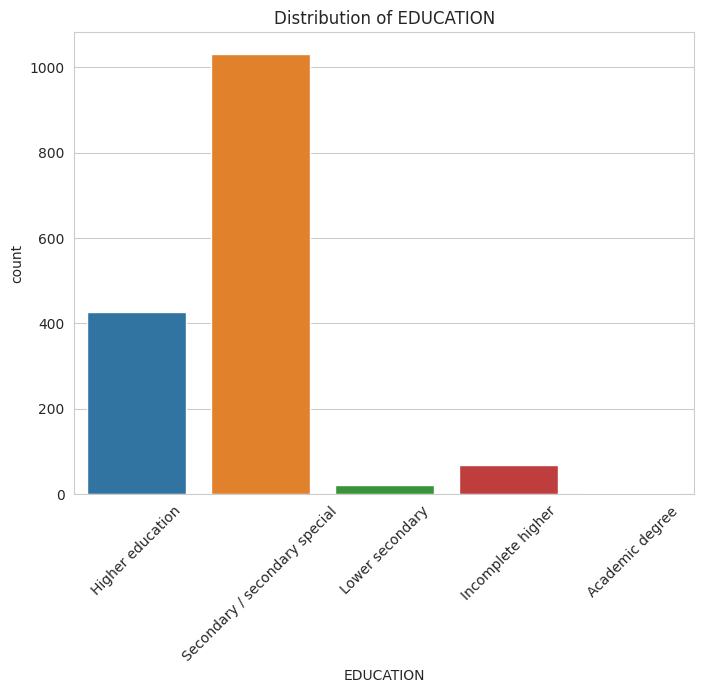

In [603]:
categ_countplot(df,'EDUCATION')

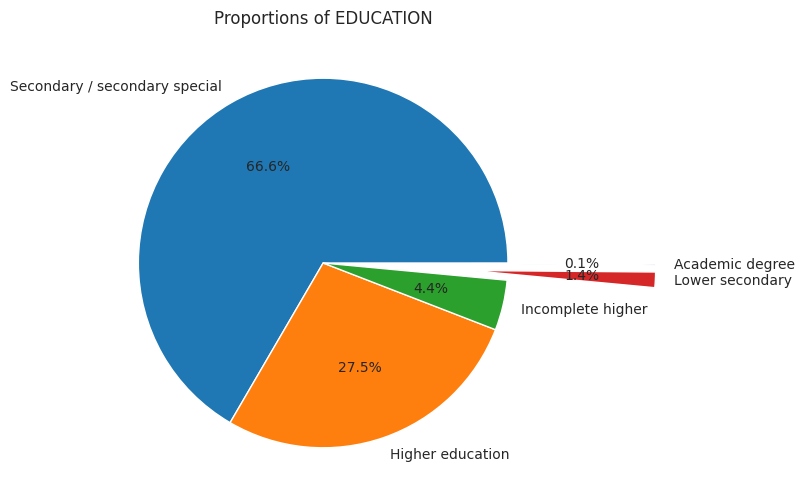

In [604]:
categ_piechart(df,'EDUCATION')

#### **3.1.7 Marital Status**

In [605]:
categ_count_freq(df,'Marital_status')

,Count,Frequency (%)
Married,1049,67.764858
Single / not married,227,14.664083
Civil marriage,101,6.524548
Separated,96,6.201550
Widow,75,4.844961


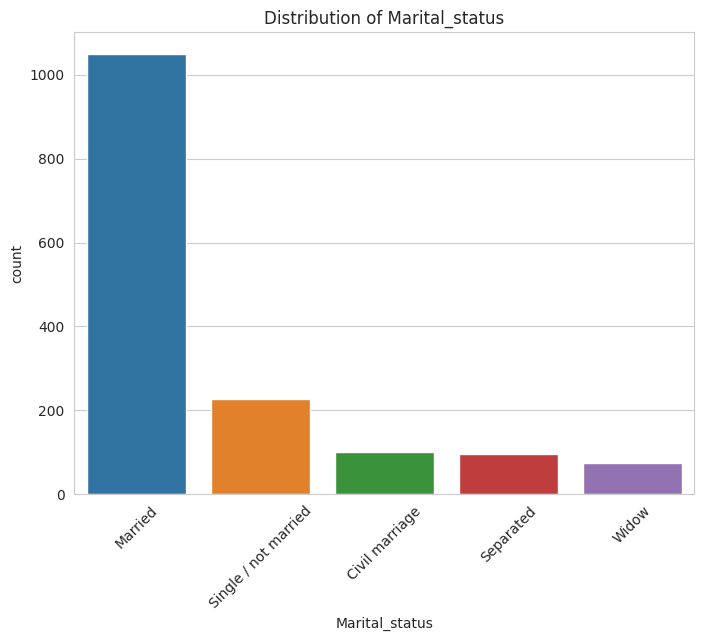

In [606]:
categ_countplot(df,'Marital_status')

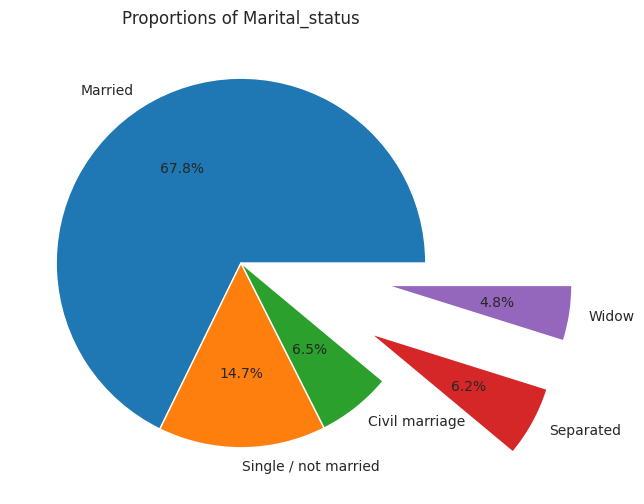

In [607]:
categ_piechart(df,'Marital_status')

#### **3.1.8 Housing Type**

In [608]:
categ_count_freq(df,'Housing_type')

,Count,Frequency (%)
House / apartment,1380,89.147287
With parents,80,5.167959
Municipal apartment,53,3.423773
Rented apartment,21,1.356589
Office apartment,9,0.581395
Co-op apartment,5,0.322997


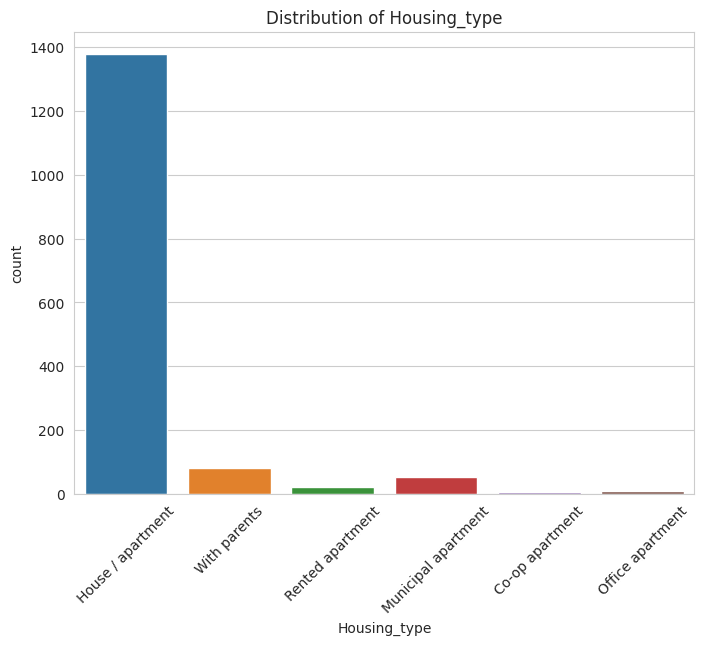

In [609]:
categ_countplot(df,'Housing_type')

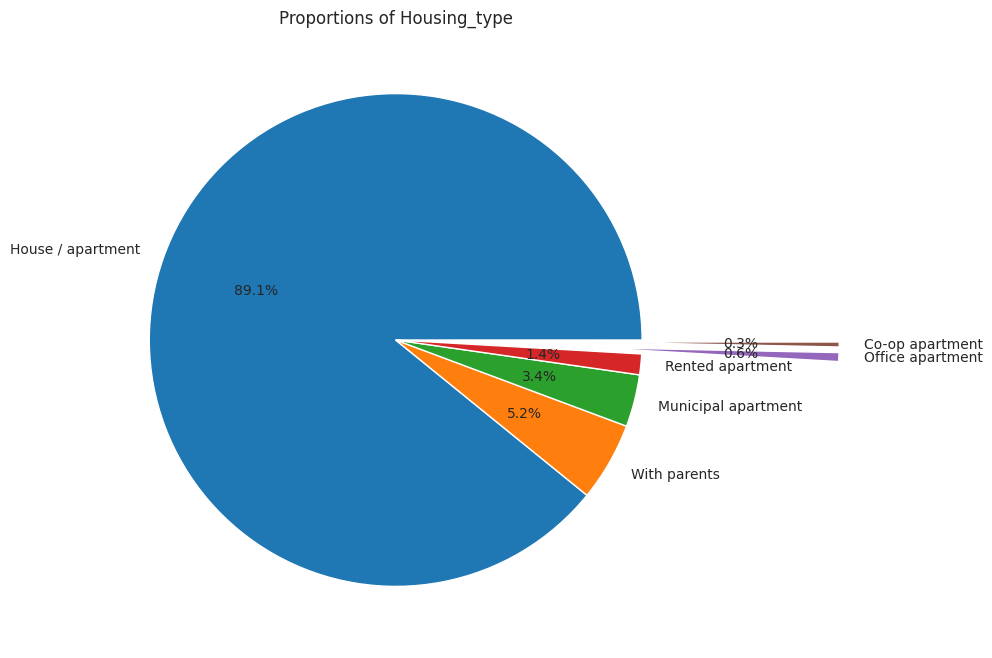

In [610]:
categ_piechart(df,'Housing_type')

#### **3.1.9 Occupation**

In [611]:
categ_count_freq(df,'Type_Occupation')

,Count,Frequency (%)
Laborers,268,25.283019
Core staff,174,16.415094
Managers,136,12.830189
Sales staff,122,11.509434
Drivers,86,8.113208
High skill tech staff,65,6.132075
Medicine staff,50,4.716981
Accountants,44,4.150943
Security staff,25,2.358491
Cleaning staff,22,2.075472


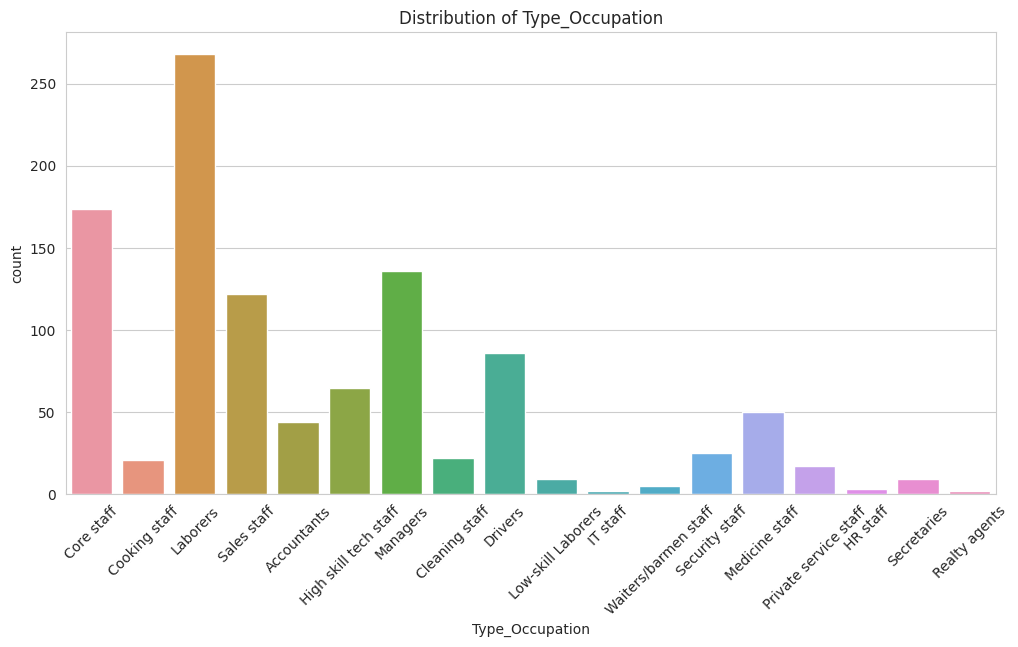

In [612]:
categ_countplot(df,'Type_Occupation')

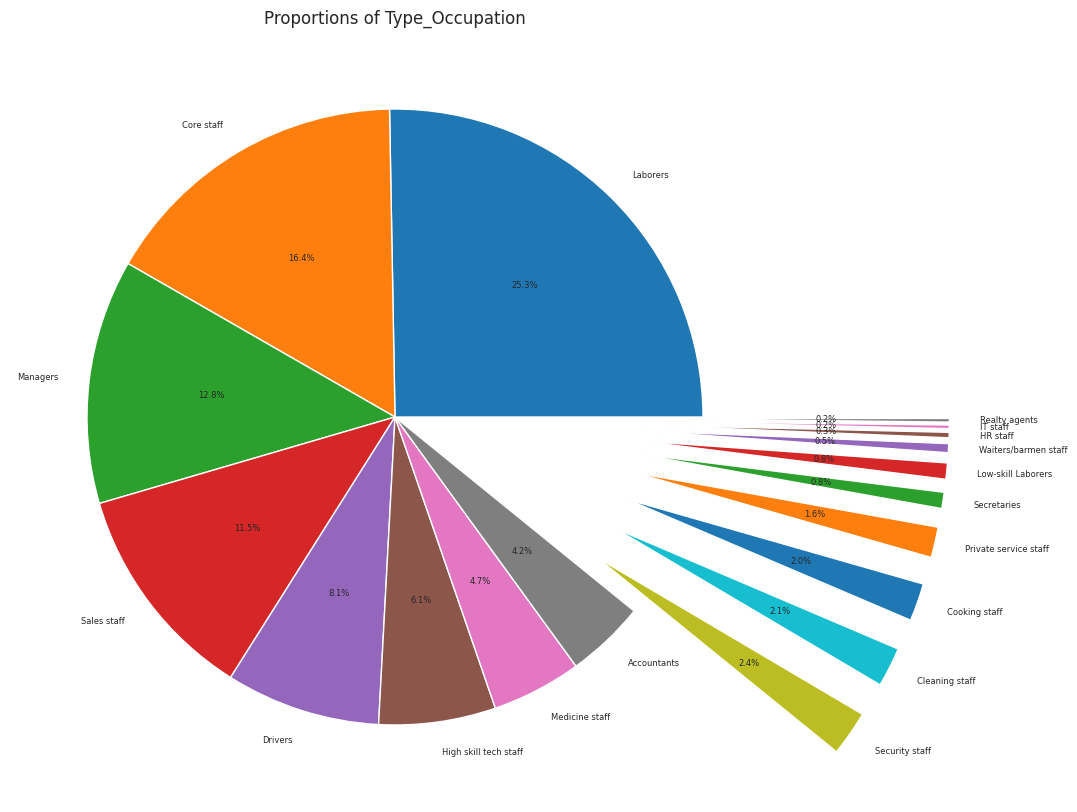

In [613]:
categ_piechart(df,'Type_Occupation')

#### **3.1.10 Mobile Phone**

In [614]:
categ_count_freq(df,'Mobile_phone')

,Count,Frequency (%)
1,1548,100.0


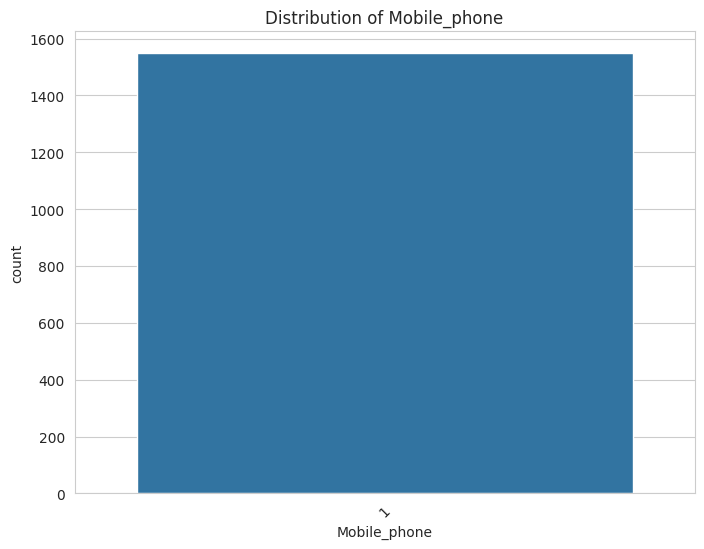

In [615]:
categ_countplot(df,'Mobile_phone')

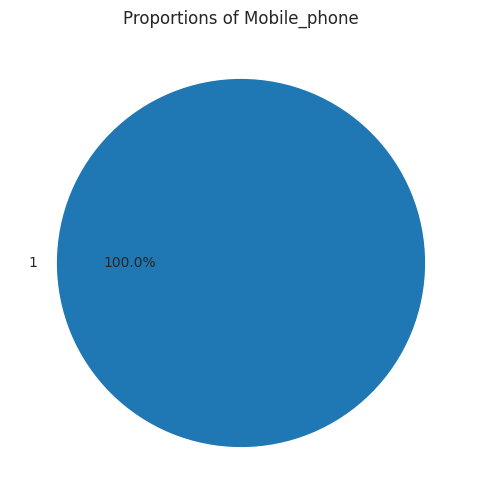

In [616]:
categ_piechart(df,'Mobile_phone')

#### **3.1.11 Work Phone**

In [617]:
categ_count_freq(df,'Work_Phone')

,Count,Frequency (%)
0,1226,79.198966
1,322,20.801034


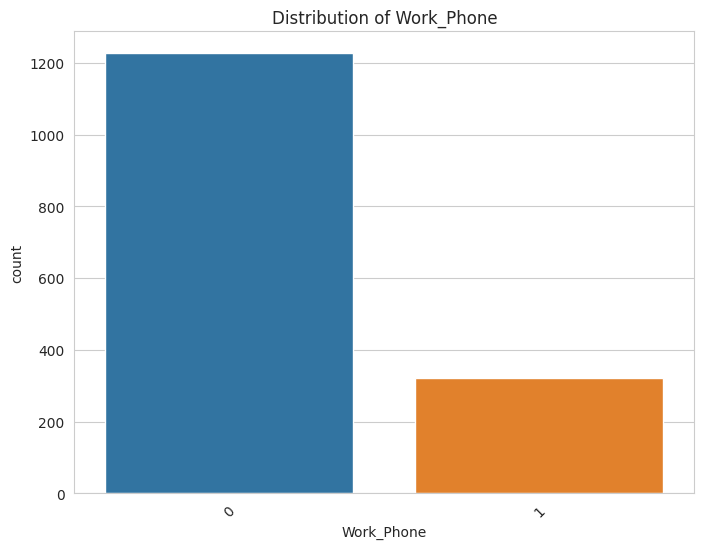

In [618]:
categ_countplot(df,'Work_Phone')

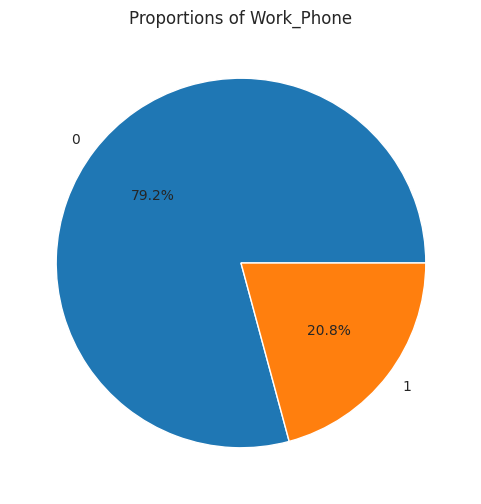

In [619]:
categ_piechart(df,'Work_Phone')

#### **3.1.12 Phone**

In [620]:
categ_count_freq(df,'Phone')

,Count,Frequency (%)
0,1069,69.056848
1,479,30.943152


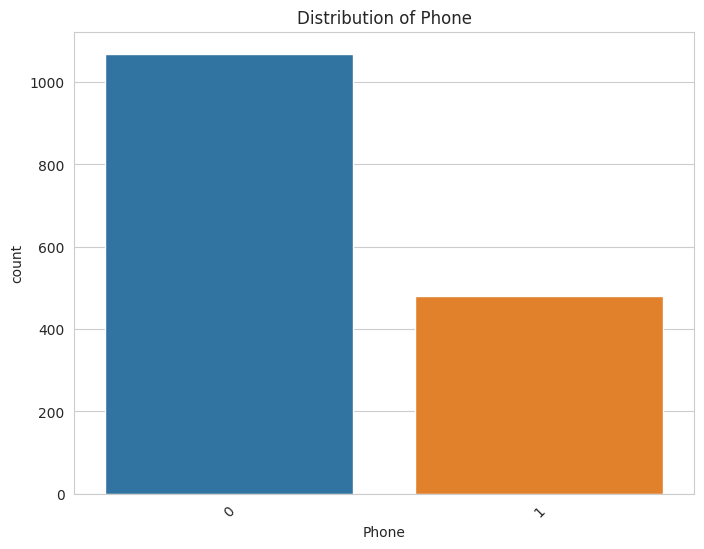

In [621]:
categ_countplot(df,'Phone')

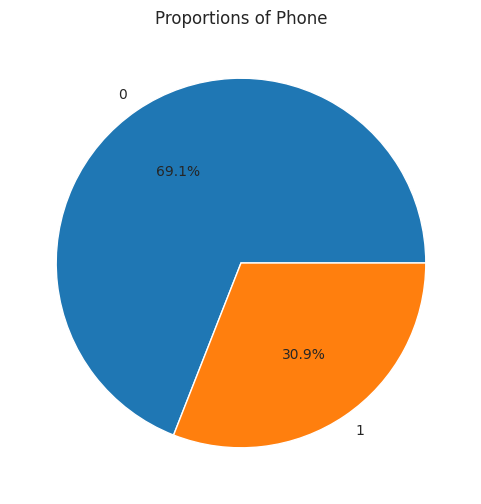

In [622]:
categ_piechart(df,'Phone')

#### **3.1.13 Email ID**

In [623]:
# features = ['CHILDREN','Family_Members','GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION',
              # 'Marital_status','Housing_type','Mobile_phone',
                   # 'Work_Phone','Phone','EMAIL_ID','Type_Occupation']
# num_features = ['CHILDREN','Family_Members','Annual_income','Birthday_count','Employed,_days']

In [624]:
categ_count_freq(df,'EMAIL_ID')

,Count,Frequency (%)
0,1405,90.762274
1,143,9.237726


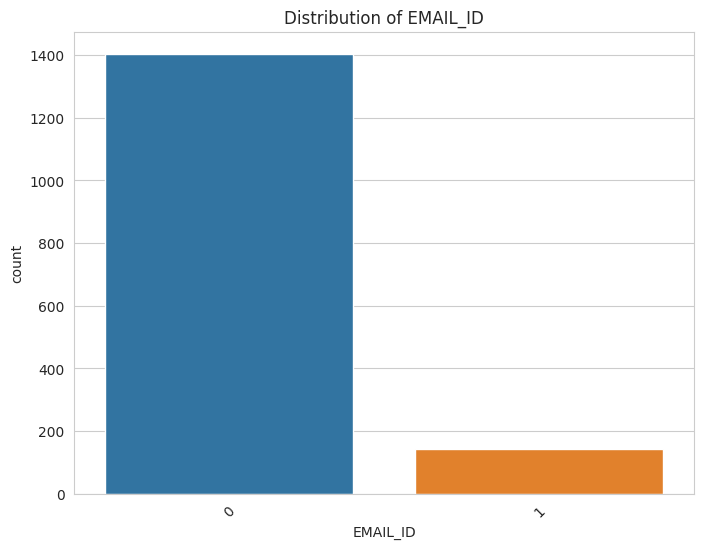

In [625]:
categ_countplot(df,'EMAIL_ID')

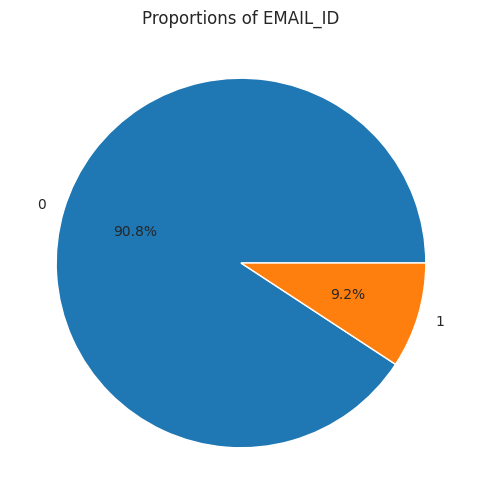

In [626]:
categ_piechart(df,'EMAIL_ID')

#### **3.1.14 Children**

In [627]:
categ_count_freq(df,'CHILDREN')

,Count,Frequency (%)
0,1091,70.478036
1,305,19.702842
2,134,8.656331
3,16,1.033592
4,1,0.064599
14,1,0.064599


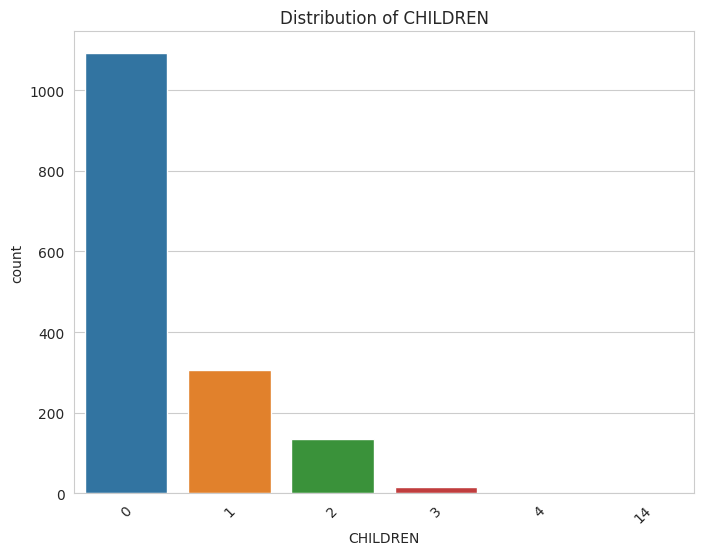

In [628]:
categ_countplot(df,'CHILDREN')

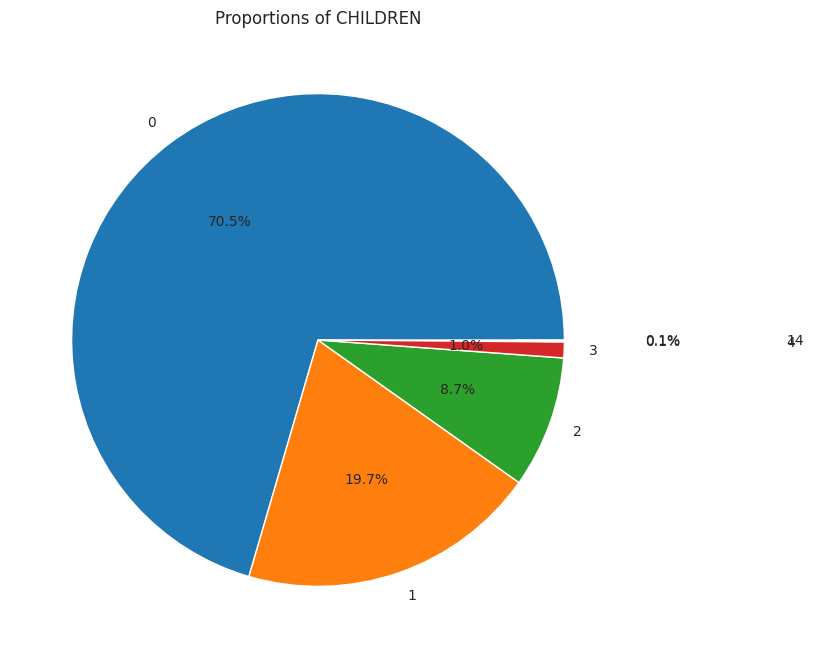

In [629]:
categ_piechart(df,'CHILDREN')

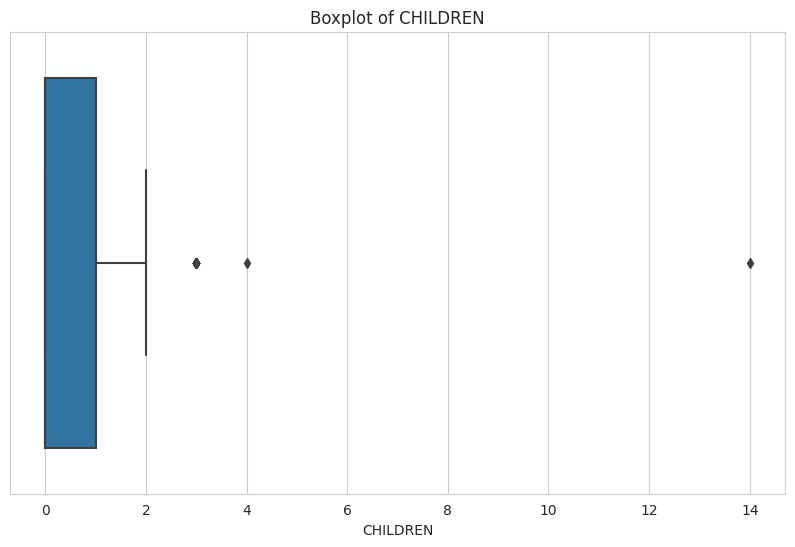

In [630]:
cont_disc_boxplot(df,'CHILDREN')

#### **3.1.15 Family Members**

In [631]:
categ_count_freq(df,'Family_Members')

,Count,Frequency (%)
2,802,51.808786
1,334,21.576227
3,268,17.312661
4,127,8.204134
5,15,0.968992
6,1,0.064599
15,1,0.064599


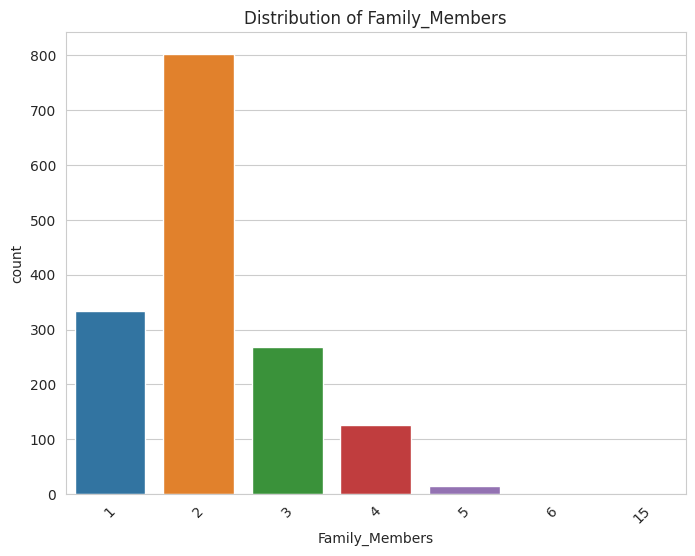

In [632]:
categ_countplot(df,'Family_Members')

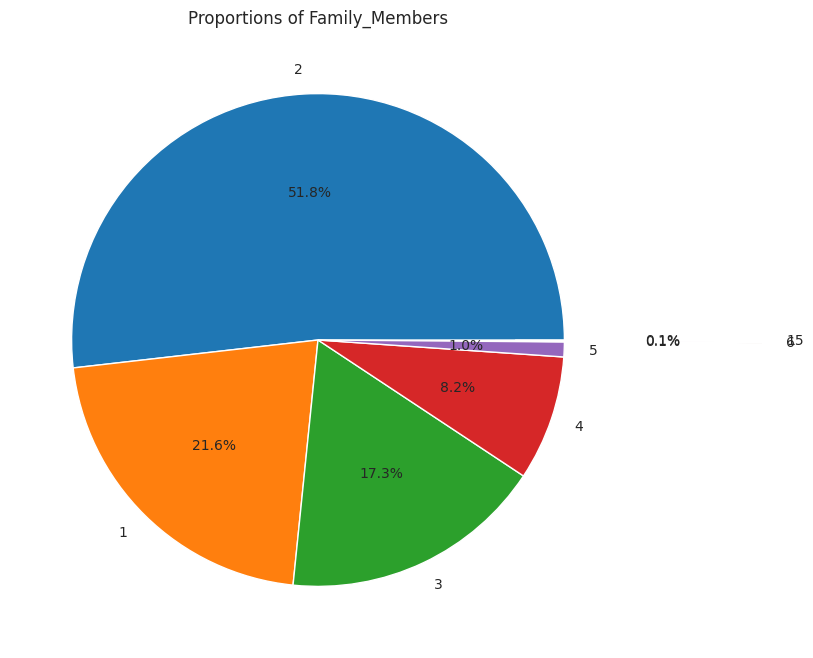

In [633]:
categ_piechart(df,'Family_Members')

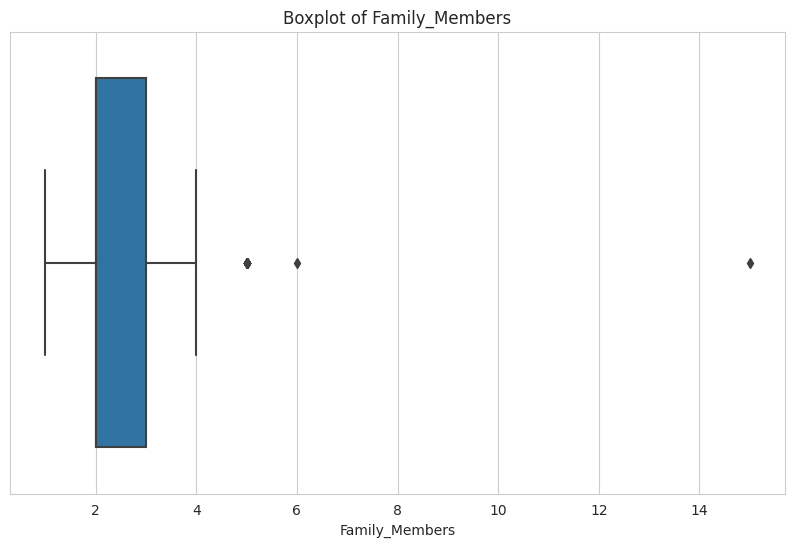

In [634]:
cont_disc_boxplot(df,'Family_Members')

#### 3**.1.16 Annual Income**

In [635]:
cont_summary_stats(df,'Annual_income')

Summary statistics of Annual_income:
count    1.525000e+03
mean     1.913993e+05
std      1.132530e+05
min      3.375000e+04
25%      1.215000e+05
50%      1.665000e+05
75%      2.250000e+05
max      1.575000e+06
Name: Annual_income, dtype: float64


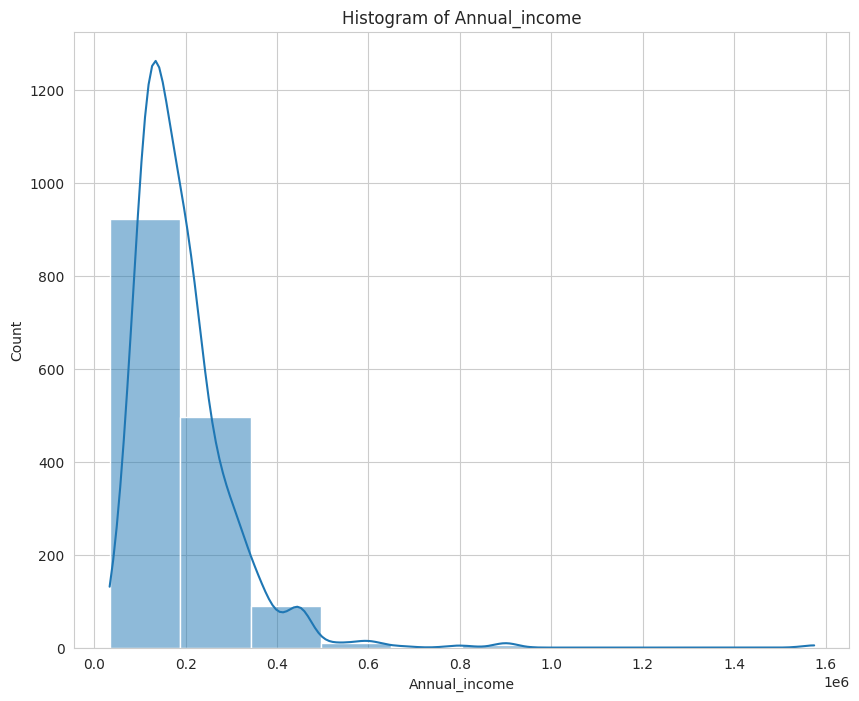

In [636]:
cont_histogram(df,'Annual_income')

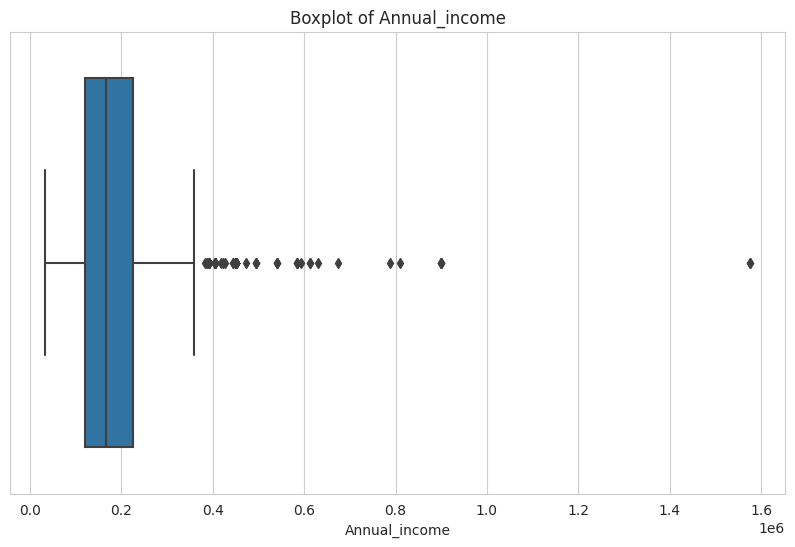

In [637]:
cont_disc_boxplot(df,'Annual_income')

#### **3.1.17 Age**

In [638]:
cont_summary_stats(df_new,'age')

Summary statistics of age:
count    1526.000000
mean       43.916063
std        11.579749
min        21.095140
25%        33.995893
50%        42.878850
75%        53.533196
max        68.298426
Name: age, dtype: float64


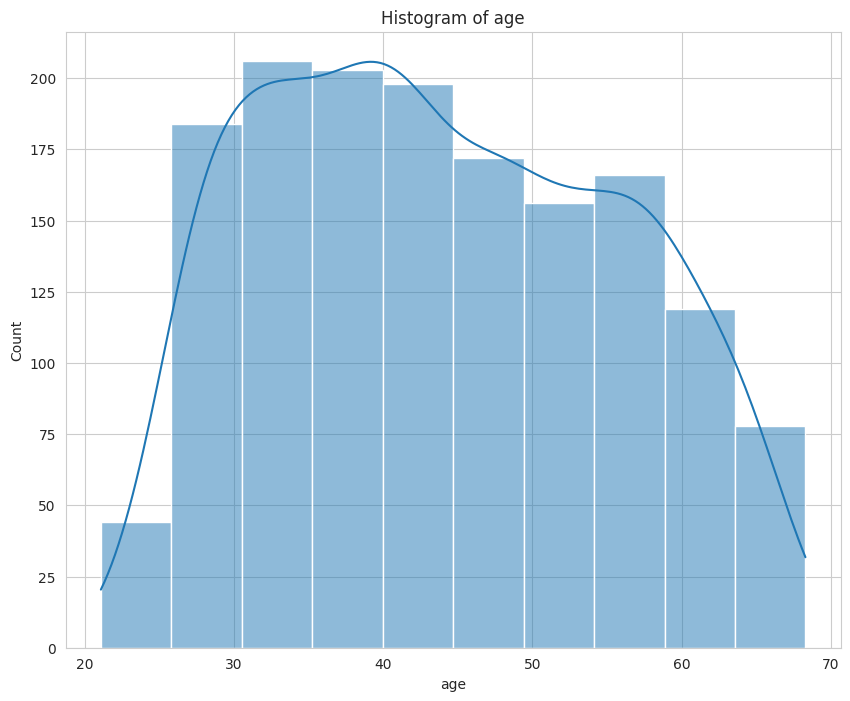

In [639]:
cont_histogram(df_new,'age')

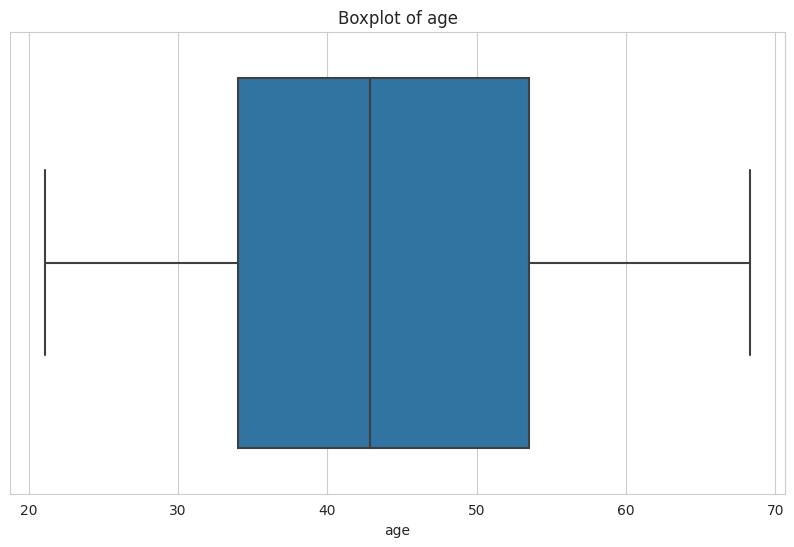

In [640]:
cont_disc_boxplot(df_new,'age')

#### **3.1.18 Employment Duration**

In [641]:
cont_summary_stats(df_new,'Emp_duration')

Summary statistics of Emp_duration:
count    1548.000000
mean        6.069757
std         6.579835
min         0.000000
25%         1.182067
50%         4.284736
75%         8.691307
max        40.758385
Name: Emp_duration, dtype: float64


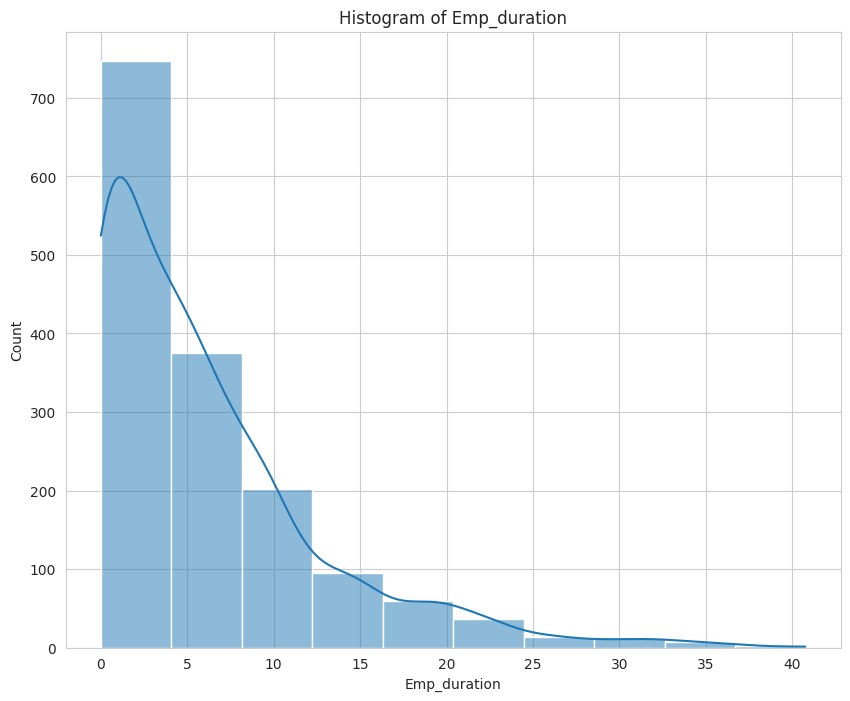

In [642]:
cont_histogram(df_new,'Emp_duration')

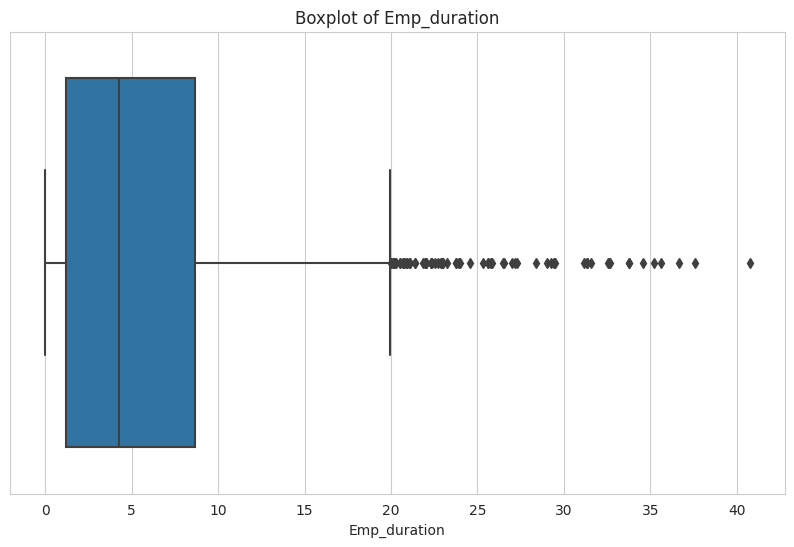

In [643]:
cont_disc_boxplot(df_new,'Emp_duration')